In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r".....\cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
df_majority = df[df['diagnosis'] == "B"]
df_minority = df[df['diagnosis'] == "M"]

df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=6)

df= pd.concat([df_majority_undersampled, df_minority], axis=0)

In [7]:
df["diagnosis"].value_counts()

diagnosis
B    212
M    212
Name: count, dtype: int64

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**Exploratory Data Analysis**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 391 to 567
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       424 non-null    int64  
 1   diagnosis                424 non-null    object 
 2   radius_mean              424 non-null    float64
 3   texture_mean             424 non-null    float64
 4   perimeter_mean           424 non-null    float64
 5   area_mean                424 non-null    float64
 6   smoothness_mean          424 non-null    float64
 7   compactness_mean         424 non-null    float64
 8   concavity_mean           424 non-null    float64
 9   concave points_mean      424 non-null    float64
 10  symmetry_mean            424 non-null    float64
 11  fractal_dimension_mean   424 non-null    float64
 12  radius_se                424 non-null    float64
 13  texture_se               424 non-null    float64
 14  perimeter_se             424 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,424.0,3.106216e+07,1.240797e+08,8670.000000,867482.750000,905236.500000,8.910554e+06,9.113205e+08
radius_mean,424.0,1.481536e+01,3.719258e+00,6.981000,12.160000,14.025000,1.736750e+01,2.811000e+01
texture_mean,424.0,1.973054e+01,4.391602e+00,10.380000,16.670000,19.335000,2.215000e+01,3.928000e+01
perimeter_mean,424.0,9.677448e+01,2.566991e+01,43.790000,77.917500,91.170000,1.142500e+02,1.885000e+02
area_mean,424.0,7.215606e+02,3.782242e+02,143.500000,450.800000,603.150000,9.367750e+02,2.501000e+03
smoothness_mean,424.0,9.767712e-02,1.439920e-02,0.052630,0.087512,0.097440,1.066000e-01,1.634000e-01
compactness_mean,424.0,1.124618e-01,5.636607e-02,0.019380,0.068165,0.104000,1.449250e-01,3.454000e-01
concavity_mean,424.0,1.028844e-01,8.586212e-02,0.000000,0.032895,0.084545,1.530000e-01,4.268000e-01
concave points_mean,424.0,5.697360e-02,4.136486e-02,0.000000,0.023033,0.052175,8.626000e-02,2.012000e-01
symmetry_mean,424.0,1.839335e-01,2.850742e-02,0.106000,0.163375,0.181300,1.986000e-01,3.040000e-01


**Checking for missing values**

In [11]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**dropping id and unnamed:32 columns as there are not useful**

In [12]:
df= df.drop(['Unnamed: 32','id'],axis=1)

In [13]:
df.head().T

,391,286,60,174,246
diagnosis,B,B,B,B,B
radius_mean,8.734,11.94,10.17,10.66,13.2
texture_mean,16.84,20.76,14.88,15.15,17.43
perimeter_mean,55.27,77.87,64.55,67.49,84.13
area_mean,234.3,441.0,311.9,349.6,541.6
smoothness_mean,0.1039,0.08605,0.1134,0.08792,0.07215
compactness_mean,0.07428,0.1011,0.08061,0.04302,0.04524
concavity_mean,0.0,0.06574,0.01084,0.0,0.04336
concave points_mean,0.0,0.03791,0.0129,0.0,0.01105
symmetry_mean,0.1985,0.1588,0.2743,0.1928,0.1487


**feature selection and dimensionality reduction**

In [14]:
df_copy=df.copy()

In [15]:
df= df.drop(["diagnosis"], axis=1, inplace=False)

In [16]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,10.17,22.80,64.01,317.0,0.1460,0.13100,0.00000,0.00000,0.2445,0.08865
286,11.940,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.03791,0.1588,0.06766,...,13.24,27.29,92.20,546.1,0.1116,0.28130,0.23650,0.11550,0.2465,0.09981
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
174,10.660,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.00000,0.1928,0.05975,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
246,13.200,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,0.1487,0.05635,...,13.94,27.82,88.28,602.0,0.1101,0.15080,0.22980,0.04970,0.2767,0.07198


In [17]:
df_copy.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
391,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,...,10.17,22.80,64.01,317.0,0.1460,0.13100,0.00000,0.00000,0.2445,0.08865
286,B,11.940,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.03791,0.1588,...,13.24,27.29,92.20,546.1,0.1116,0.28130,0.23650,0.11550,0.2465,0.09981
60,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.02,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
174,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.00000,0.1928,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
246,B,13.200,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,0.1487,...,13.94,27.82,88.28,602.0,0.1101,0.15080,0.22980,0.04970,0.2767,0.07198


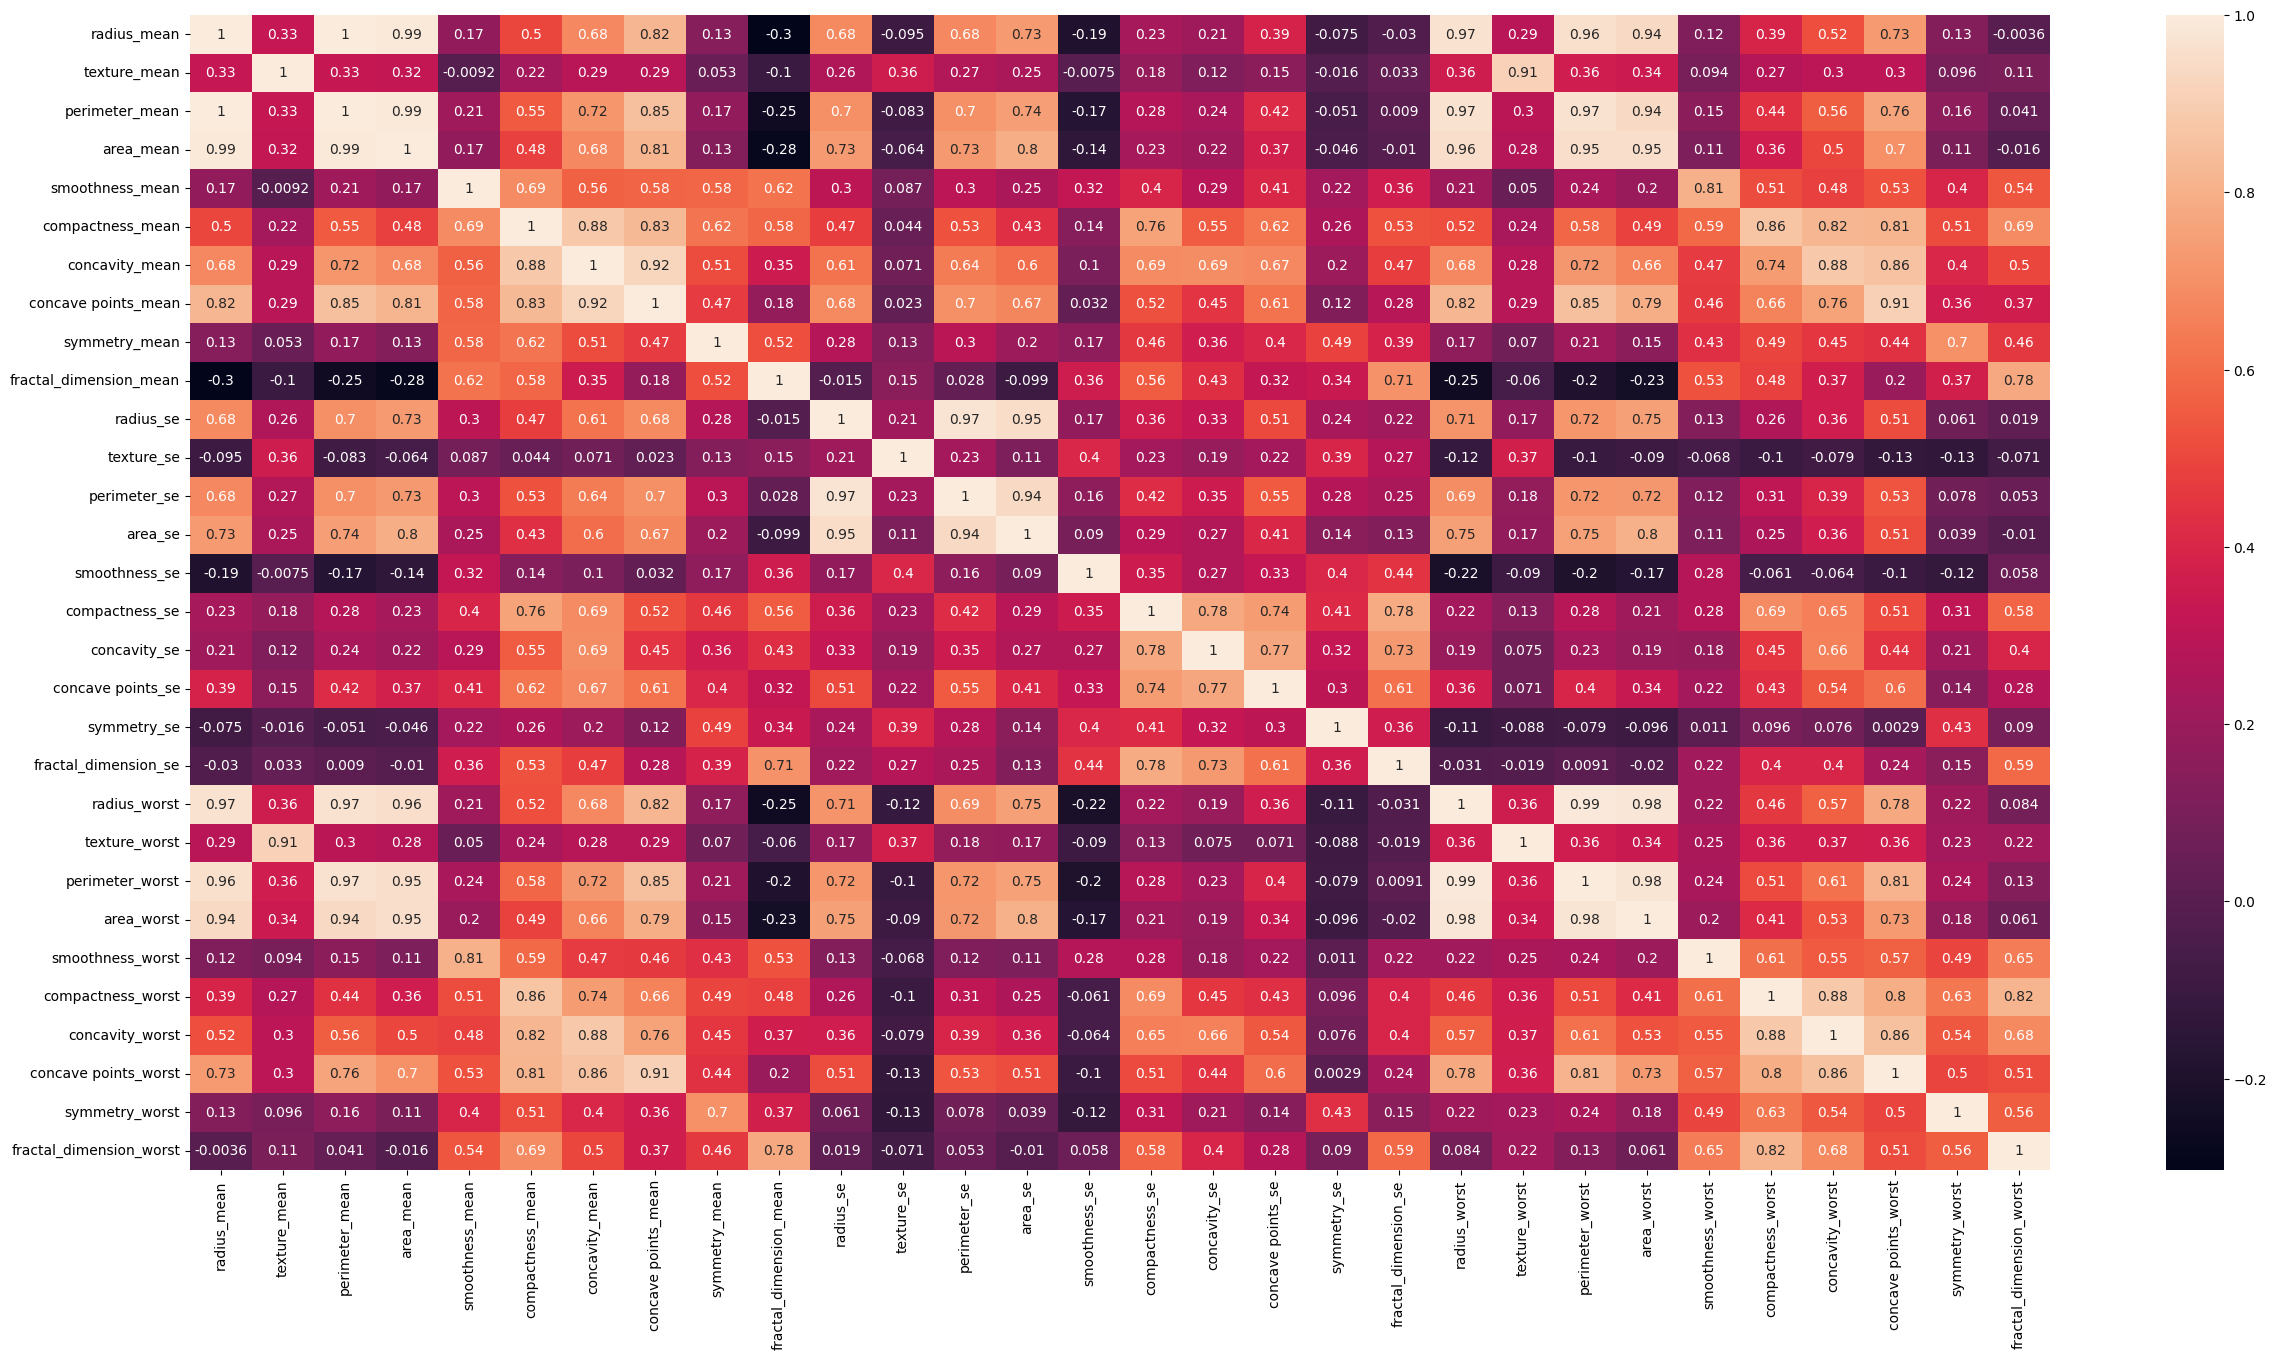

In [18]:
#Checking for the correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Data Visualization**

**Pair plot**

<Figure size 1500x1000 with 0 Axes>

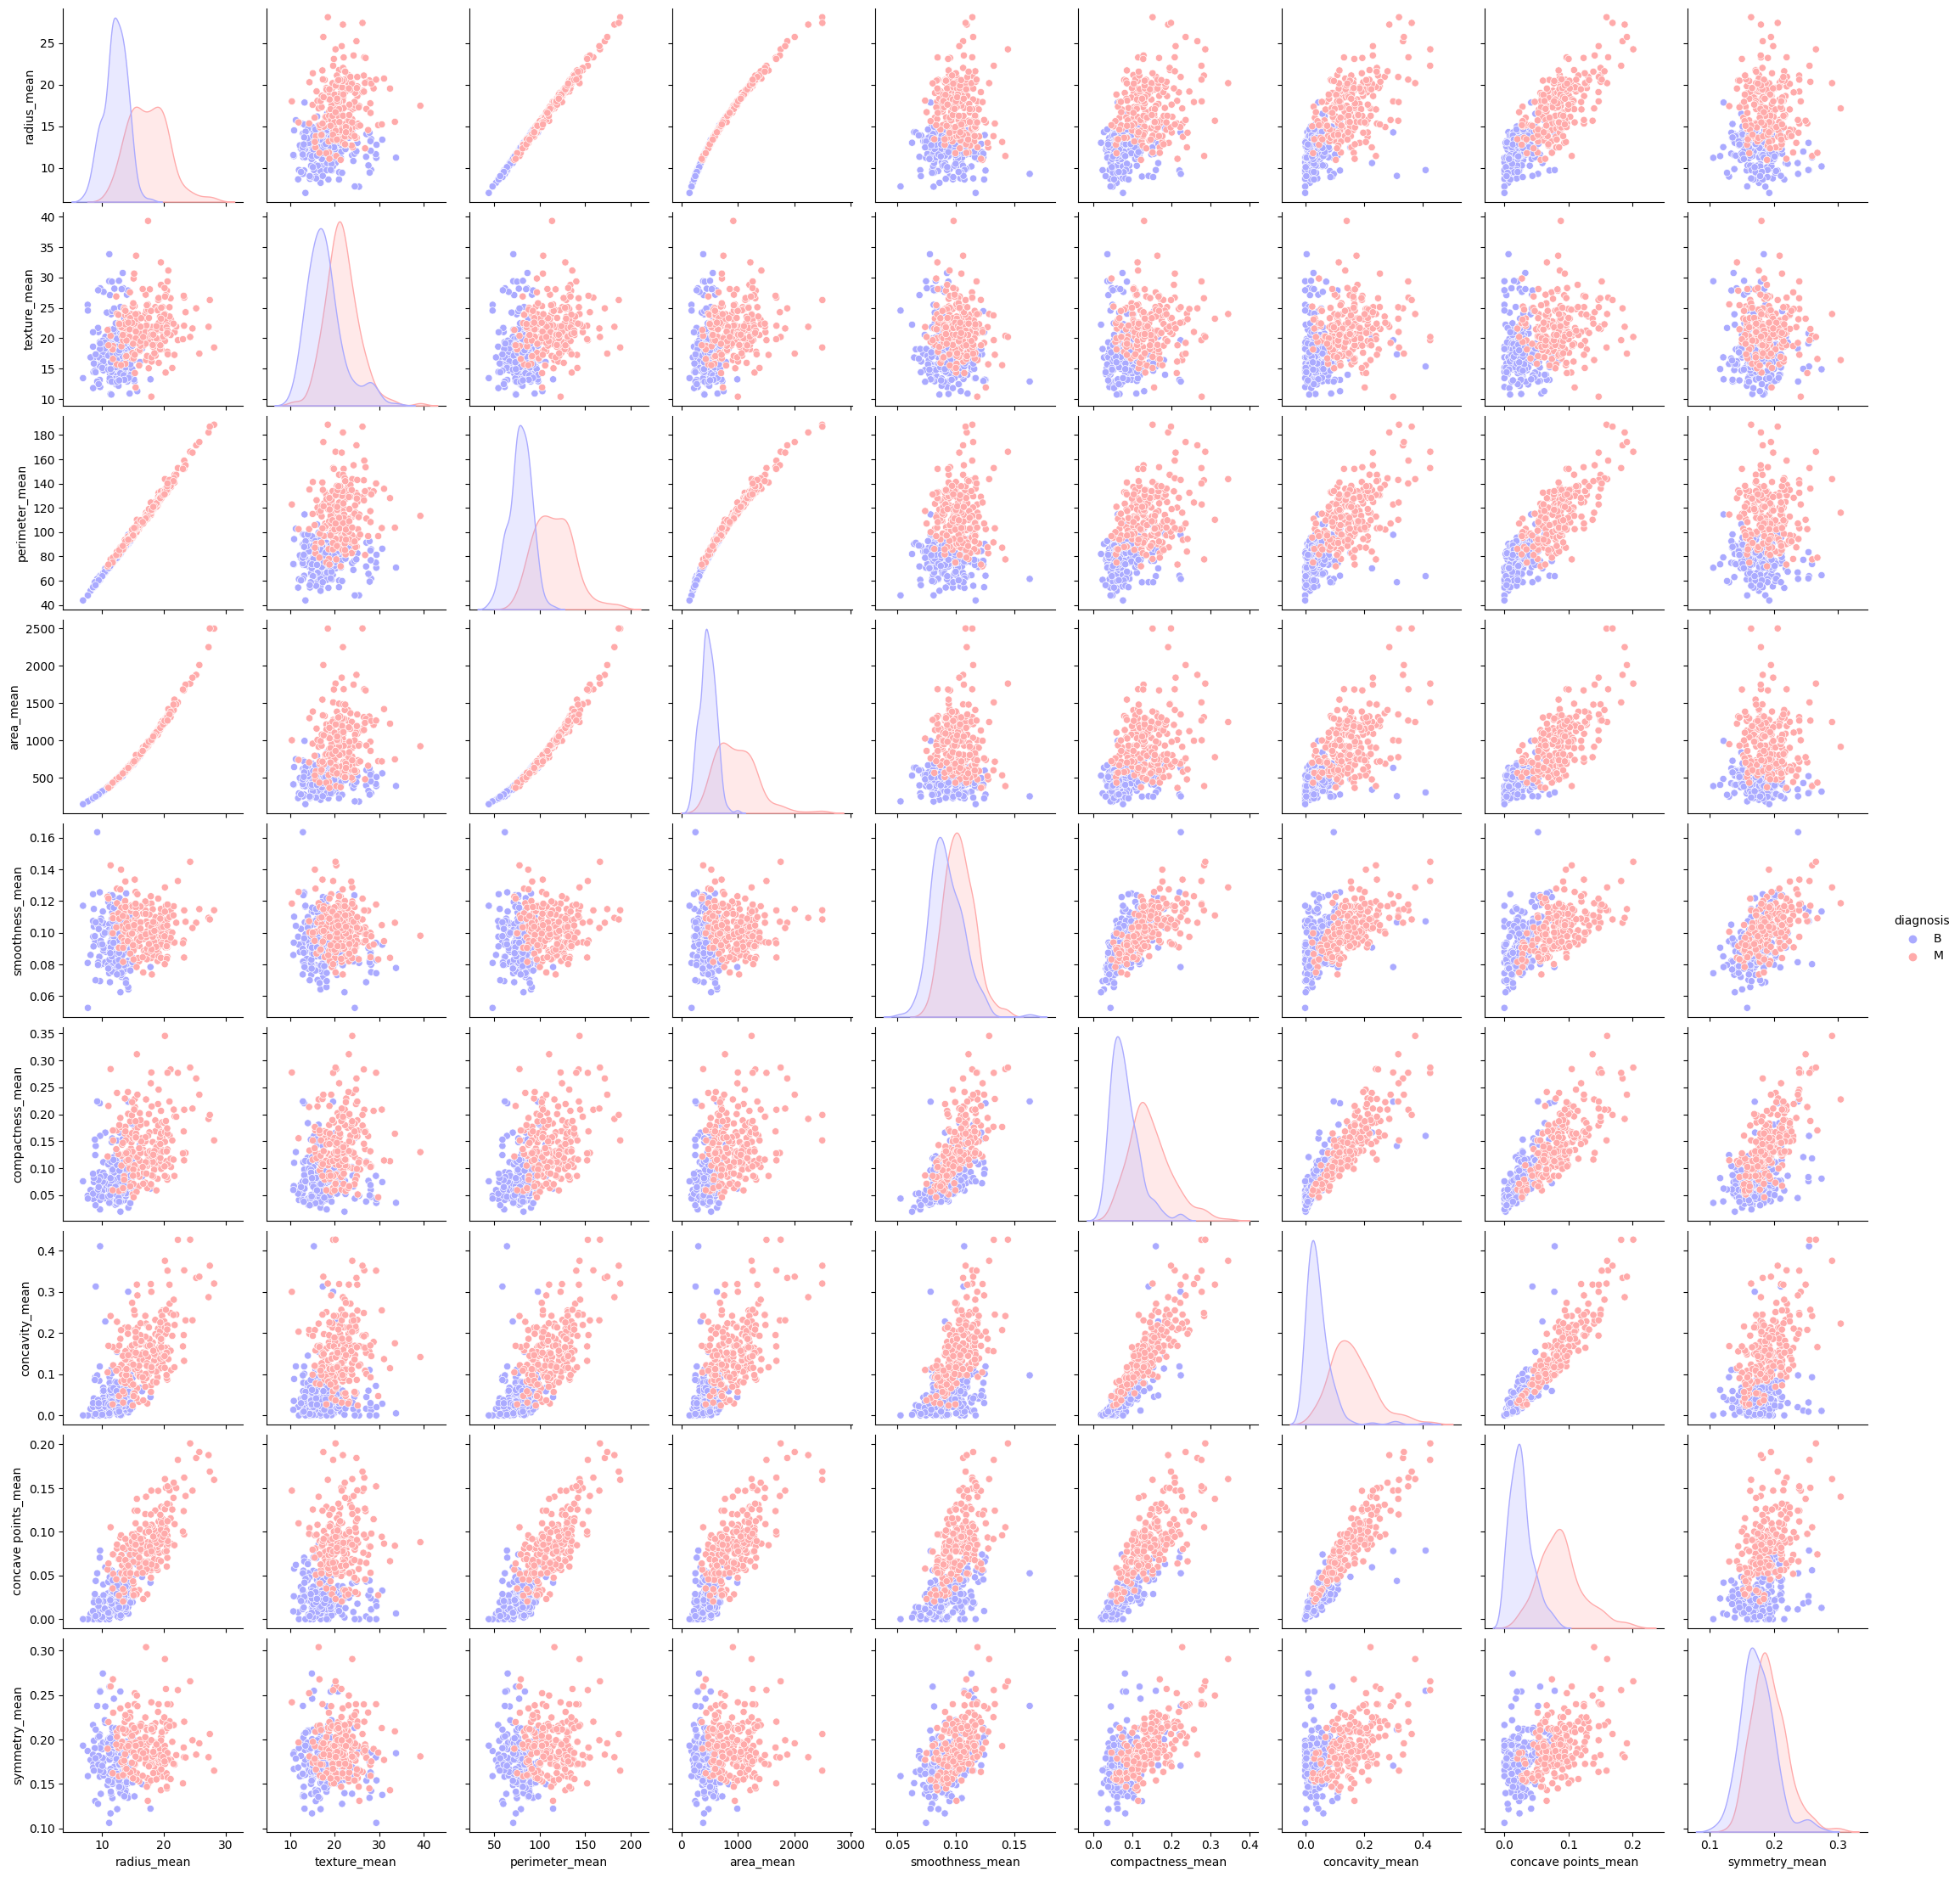

In [19]:
plt.figure(figsize=(15,10))
df1=df_copy[['radius_mean', 'texture_mean', 'perimeter_mean','area_mean'
        , 'smoothness_mean', 'compactness_mean', 'concavity_mean'
        ,'concave points_mean', 'symmetry_mean','diagnosis']]
sns_plot = sns.pairplot(data=df1,hue='diagnosis', palette='bwr')
plt.show()

**Encoding categorical data**

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder = LabelEncoder()
df_copy['diagnosis'] = encoder.fit_transform(df_copy['diagnosis'])

**Separating the independant and the dependant variable**

In [26]:
y = df_copy['diagnosis'].values
X= df_copy.drop('diagnosis',axis=1).values

**Splitting the dataset**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=6)

**Feature Scaling**

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test= scaler.transform(x_test)

**Modeling**

In [31]:
from sklearn.svm import SVC

In [32]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)

ypred_svc = svc.predict(X_test)

In [33]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((339, 30), (339,), (85, 30), (85,))

**Evaluation and comparision of all the model**

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

**confusion matrix**

In [35]:
import numpy as np
cm = np.array(confusion_matrix(y_test, ypred_svc, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])

confusion_mat

,predicted_cancer,predicted_healthy
cancer,39,1
healthy,1,44


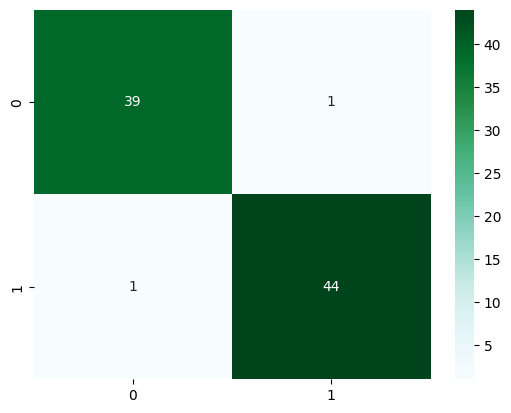

In [36]:
sns.heatmap(cm,annot=True,fmt='g',cmap='BuGn')
plt.show()

**specificity & sensitivity**

In [37]:
tn, fp, fn, tp = cm.ravel()

specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("Specificity: {:.3f}".format(specificity))
print("Sensitivity: {:.3f}".format(sensitivity))

Specificity: 0.975
Sensitivity: 0.978


**Accuracy score**

In [38]:
print(accuracy_score(y_test, ypred_svc))

0.9764705882352941


**Precision**

In [39]:
print(precision_score(y_test, ypred_svc))

0.975


**Recall**

In [40]:
print(recall_score(y_test, ypred_svc))

0.975


**Classification Report**

In [41]:
print(classification_report(y_test, ypred_svc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.97      0.97      0.97        40

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



**The ROC Curve  &  Area Under Curve**

In [42]:
y_score = svc.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

0.9955555555555555
